RETRASO DE VUELOS Y CAUSA  

Contexto
Con estos datos puede encontrar la causa del retraso del vuelo, ya sea un retraso de seguridad, un retraso de NAS, un retraso de la aerolínea, etc.  


Contenido
El contenido es más que solo filas y columnas. Facilite el inicio para otros describiendo cómo adquirió los datos y el período de tiempo que representan.  


Día de la semana → 1 (lunes) - 7 (domingo)  

Fecha → Fecha programada  

DepTime → Hora de salida real (local, hhmm)  

ArrTime → Hora de llegada real (local, hhmm)  

CRSArrTime → Hora de llegada programada (local, hhmm)  

UniqueCarrier → Código de operador único


Aerolínea → Compañía aérea  

FlightNum → número de vuelo  

TailNum → número de cola del avión  

ActualElapsedTime → Tiempo real que un avión pasa en el aire (en minutos) con TaxiIn/Out  

CRSElapsedTime → CRS Tiempo transcurrido de vuelo (tiempo transcurrido estimado), en minutos  

AirTime → Tiempo de vuelo (en minutos)  

ArrDelay → Diferencia en minutos entre la hora de llegada programada y la real  

Origen → Código de aeropuerto de origen IATA (Asociación Internacional de Transporte Aéreo)  

Org_Airport → Nombre del aeropuerto de origen  

Dest → Código IATA de destino  

Dest_Airport → Nombre del aeropuerto de destino  

Distancia → Distancia entre aeropuertos (millas)  

TaxiIn → Descenso del vehículo y llegada a la puerta del aeropuerto de destino, en minutos  

TaxiOut → El tiempo transcurrido entre la salida de la puerta del aeropuerto de origen y el despegue, en minutos  

Cancelado → ¿Se canceló el vuelo?  

Código de cancelación → Motivo de la cancelación  

Desviado → 1 = sí, 0 = no  

CarrierDelay → Retraso del vuelo debido a la aerolínea (por ejemplo, problemas de mantenimiento o tripulación, limpieza de la aeronave, abastecimiento de combustible, etc.), 0 = No, sí = (en minutos)  

WeatherDelay → Retraso del vuelo debido al clima, 0 = No, sí = (en minutos)  

NASDelay → Retraso de vuelo por parte de la NSA (Sistema Nacional de Aviación), 0 = No, sí = (en minutos)  

SecurityDelay → Retraso de vuelo por este motivo, 0 = No, sí = (en minutos)  

LateAircraftDelay → Retraso de vuelo por este motivo, 0 = No, sí = (en minutos)

IMPORTACION DE BIBLIOTECAS

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

CARGA DE DATOS

In [13]:
df = pd.read_csv("/content/drive/MyDrive/RetrasodeVuelosyCausas.csv")

MONTAR GOOGLE DRIVE

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


SELECCION Y PREPARACION DE CARACTERISTICAS PARA CLUSTERING

In [21]:
# Crea una lista de nombres de columnas que se utilizarán para el análisis de clustering.
features = [
    "ArrDelay", "DepDelay", "CarrierDelay", "WeatherDelay",
    "NASDelay", "SecurityDelay", "LateAircraftDelay"
]
#Asigna este nuevo DataFrame (que contiene solo las columnas de retraso seleccionadas) a la variable
df_cluster = df[features].copy()

LIMPIEZA DE DATOS

In [22]:
#Elimina las filas que contienen valores nulos (NaN) en cualquiera de las columnas
#del DataFrame df_cluster. El argumento inplace=True modifica el DataFrame
#directamente sin necesidad de reasignarlo.
df_cluster.dropna(inplace=True)
df_cluster = df_cluster[df_cluster.apply(lambda x: (x < 1000).all(), axis=1)]

ESCALADO DE DATOS

In [23]:
#Crea una instancia del objeto
scaler = StandardScaler()
#Asigna el array NumPy resultante (con los datos escalados) a la variable
X_scaled = scaler.fit_transform(df_cluster)

APLICACION DEL ALGORITMO K-MEANS

In [24]:
#Crea una instancia del objeto
kmeans = KMeans(n_clusters=4, random_state=42)
#Asigna el array de etiquetas de cluster resultantes a la variable
clusters = kmeans.fit_predict(X_scaled)

AÑADIR LAS ETIQUETAS DE CUSTER AL DATAFRAME

In [25]:
#Crea una nueva columna llamada "Cluster" en el DataFrame
df_cluster["Cluster"] = clusters

VIZUALIZACION DE LOS CLUSTERS

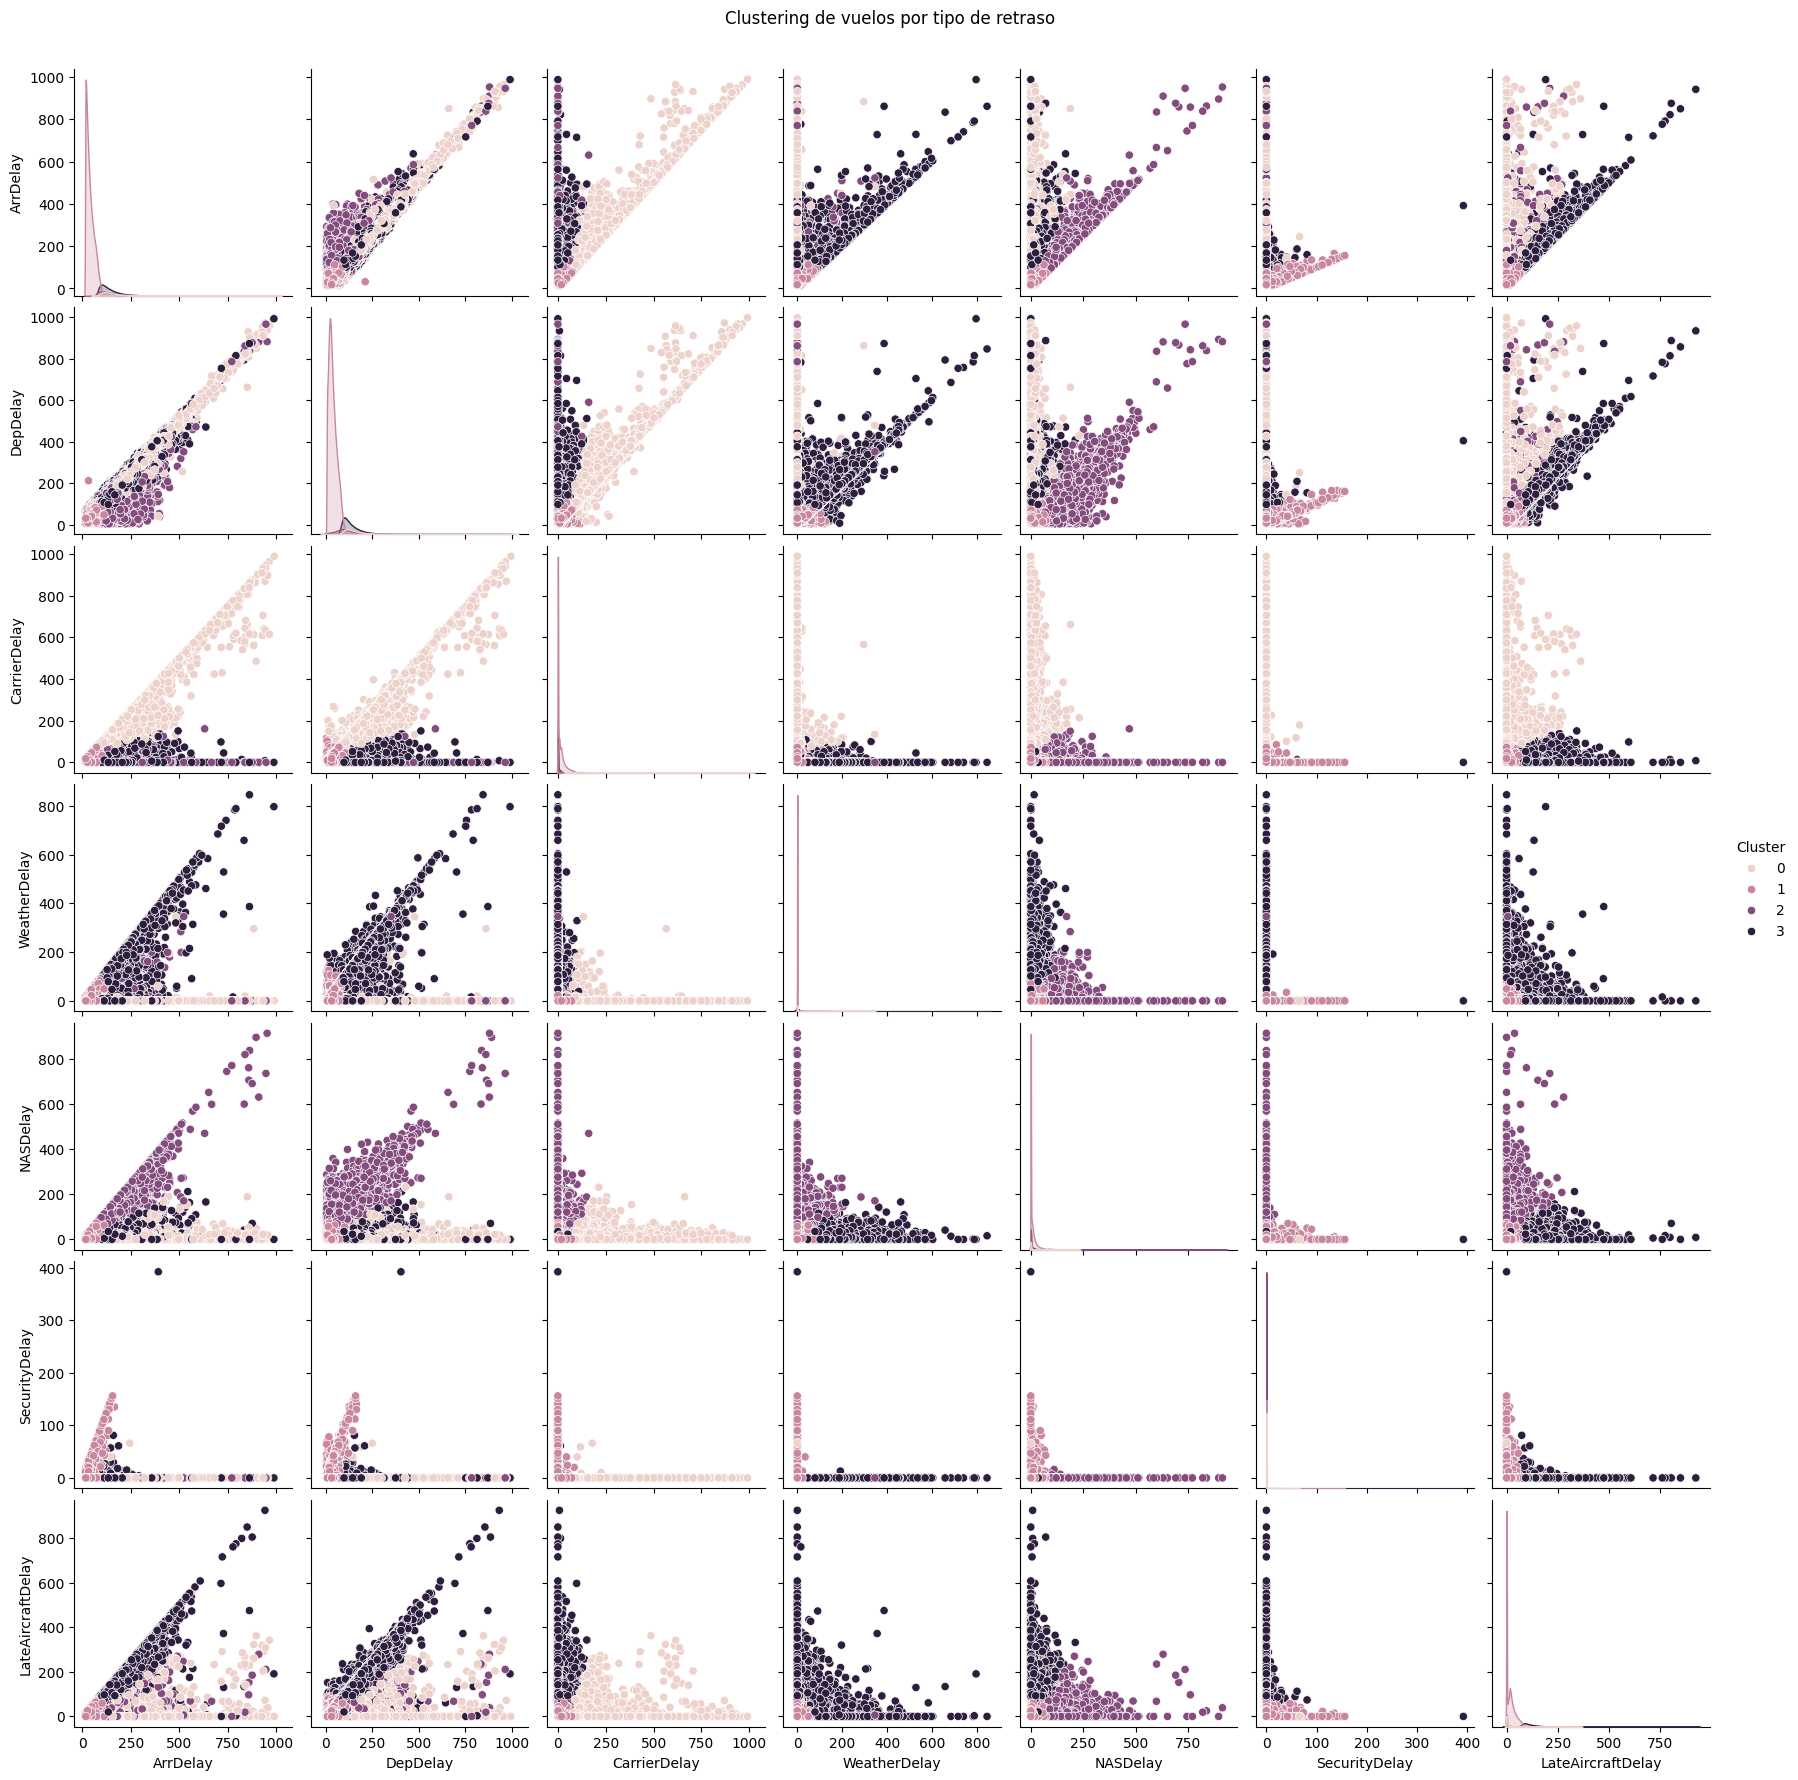

In [26]:
#Crea una matriz de gráficos de dispersión (pair plot) utilizando Seaborn.
sns.pairplot(df_cluster, hue="Cluster", diag_kind="kde")
#Agrega un título principal a la figura
plt.suptitle("Clustering de vuelos por tipo de retraso", y=1.02)
#Muestra la figura generada.
plt.show()

CONCLUSION  

El código implementa un análisis de clustering utilizando el algoritmo K-Means sobre los datos de retrasos de vuelos. Al agrupar los vuelos en 4 clusters distintos en función de las diferentes categorías de retraso (llegada, salida, aerolínea, clima, NAS, seguridad y aeronave tardía), el análisis busca identificar patrones de retraso que caracterizan a diferentes grupos de vuelos.  


La visualización mediante el pairplot es crucial para entender la conclusión. Observando que debería poder identificar.

Cómo se distribuyen los diferentes tipos de retraso dentro de cada cluster:  
Por ejemplo, un cluster podría tener predominantemente retrasos por "CarrierDelay", mientras que otro podría tener altos valores en "WeatherDelay" y "NASDelay".  

Si los clusters están bien separados: Si los puntos de diferentes colores (clusters) se agrupan en distintas regiones del gráfico, sugiere que el algoritmo ha encontrado agrupaciones significativas.  

Las características que son más importantes para distinguir entre clusters:  
Las combinaciones de características que muestran una clara separación entre los colores son aquellas que más contribuyen a la diferenciación de los grupos.  

En términos generales, la conclusión del análisis es que existen (al menos) 4 grupos distintos de vuelos en el conjunto de datos, cada uno caracterizado por un perfil particular de retrasos. Por ejemplo, podrías encontrar clusters que representen:  


Vuelos con retrasos bajos en general.
Vuelos con retrasos significativos debido principalmente a problemas de la aerolínea.
Vuelos afectados por retrasos relacionados con el clima o el sistema aéreo (NAS).
Vuelos que experimentan retrasos significativos debido a problemas con aeronaves tardías.
Para obtener una conclusión más específica y detallada, necesitarías analizar el contenido de cada uno de los 4 clusters. Esto implicaría:  


Analizar las características promedio o las distribuciones de cada tipo de retraso dentro de cada cluster. Por ejemplo, calcular el promedio de CarrierDelay para los vuelos en el Cluster 0, Cluster 1, Cluster 2 y Cluster 3.
Comparar estos valores entre los clusters para describir las características distintivas de cada grupo.
Sin este análisis adicional (que no está en el código proporcionado [1]), la conclusión general es que el clustering ha revelado la presencia de diferentes perfiles de retraso dentro de los datos, y el pairplot es la herramienta utilizada para visualizar y empezar a interpretar estas agrupaciones.

